#1. Import et Exploration

In [ ]:
import pandas as pd
link = "https://raw.githubusercontent.com/MaskiVal/DataSets/main/cancer_breast.csv"
df = pd.read_csv(link)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Aucun NaN, sauf pour la dernière colonne "Unnamed: 32" qui est entièrement vide

In [ ]:
df = df.drop('Unnamed: 32', axis=1)

#2. Distributions des données & Corrélations

## Distribution des diagnostiques

Nombre de cellules diagnostiquées comme malignes ou bénines

In [ ]:
diag_count = df['diagnosis'].value_counts().reset_index()
diag_count

,index,diagnosis
0,B,357
1,M,212


In [ ]:
diag_count.columns = ['Diagnosis', 'Count']
diag_count

,Diagnosis,Count
0,B,357
1,M,212


In [ ]:
import plotly.express as px
fig = px.bar(diag_count, x='Diagnosis', y='Count',
             title='Répartition des diagnostics de cancer du sein')
fig.show()

In [ ]:
fig = px.pie(diag_count, values='Count', names='Diagnosis',
             title='Répartition des diagnostics de cancer du sein')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

==> Problème de répartition des 2 groupes de cellules.

A FAIRE : ML pour augmenter la proportion de cellules M par rapport aux cellules B

--> "diagnosis" est la seule variable catégorique/variable qualitative

## Variables numériques

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
var = df.drop(['id','diagnosis'],axis = 1 )
var

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


On a 30 variables numériques, sans compter l'id des cellules

In [ ]:
var.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Il y a des variables qui contiennent des zéros comme valeurs minimales, on va les afficher

## Gestion des zéros

In [ ]:
# df.eq(0) qui compare le dataframe avec la valeur zéro et renvoie True ou False, ajouter à any() cela renvoie les colonnes True
df.columns[df.eq(0).any()]

Index(['concavity_mean', 'concave points_mean', 'concavity_se',
       'concave points_se', 'concavity_worst', 'concave points_worst'],
      dtype='object')

Toutes les variables liées à la concavité des cellules sont concernées par les zéros

In [ ]:
df['concavity_mean'].value_counts().sort_index(ascending=True)

0.000000    13
0.000692     1
0.000974     1
0.001194     1
0.001461     1
            ..
0.363500     1
0.375400     1
0.410800     1
0.426400     1
0.426800     1
Name: concavity_mean, Length: 537, dtype: int64

In [ ]:
df['concave points_mean'].value_counts().sort_index(ascending=True)

0.000000    13
0.001852     1
0.002404     1
0.002924     1
0.002941     1
            ..
0.182300     1
0.184500     1
0.187800     1
0.191300     1
0.201200     1
Name: concave points_mean, Length: 542, dtype: int64

In [ ]:
df['concavity_se'].value_counts().sort_index(ascending=True)

0.000000    13
0.000692     1
0.000793     1
0.000974     1
0.001128     1
            ..
0.143500     1
0.143800     1
0.153500     1
0.303800     1
0.396000     1
Name: concavity_se, Length: 533, dtype: int64

In [ ]:
df['concave points_se'].value_counts().sort_index(ascending=True)

0.000000    13
0.001852     1
0.002386     1
0.002404     1
0.002924     1
            ..
0.034410     1
0.034870     1
0.039270     1
0.040900     1
0.052790     1
Name: concave points_se, Length: 507, dtype: int64

In [ ]:
df['concavity_worst'].value_counts().sort_index(ascending=True)

0.000000    13
0.001845     1
0.003581     1
0.004955     1
0.005518     1
            ..
0.938700     1
0.960800     1
1.105000     1
1.170000     1
1.252000     1
Name: concavity_worst, Length: 539, dtype: int64

In [ ]:
df['concave points_worst'].value_counts().sort_index(ascending=True)

0.000000    13
0.008772     1
0.009259     1
0.010420     1
0.011110     2
            ..
0.273300     1
0.275600     1
0.286700     1
0.290300     1
0.291000     1
Name: concave points_worst, Length: 492, dtype: int64

In [ ]:
df[df['concavity_mean']==0]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,0.07818,0.2241,1.5080,1.553,9.833,0.010190,0.010840,0.0,0.0,0.02659,0.004100,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0,0.0,0.2932,0.09382
140,868999,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,0.06422,0.1988,0.4960,1.218,12.260,0.006040,0.005656,0.0,0.0,0.02277,0.003220,10.620,14.10,66.53,342.9,0.12340,0.07204,0.0,0.0,0.3105,0.08151
174,871642,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,0.05975,0.3309,1.9250,2.155,21.980,0.008713,0.010170,0.0,0.0,0.03265,0.001002,11.540,19.20,73.20,408.3,0.10760,0.06791,0.0,0.0,0.2710,0.06164
175,872113,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,0.06724,0.2204,0.7873,1.435,11.360,0.009172,0.008007,0.0,0.0,0.02711,0.003399,9.262,17.04,58.36,259.2,0.11620,0.07057,0.0,0.0,0.2592,0.07848
192,875099,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,0.06447,0.3539,4.8850,2.230,21.690,0.001713,0.006736,0.0,0.0,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0,0.0,0.1909,0.06559
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,0.07359,0.3368,2.7770,2.222,17.810,0.020750,0.014030,0.0,0.0,0.06146,0.006820,8.952,22.44,56.65,240.1,0.13470,0.07767,0.0,0.0,0.3142,0.08116
391,903483,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,0.07098,0.5169,2.0790,3.167,28.850,0.015820,0.019660,0.0,0.0,0.01865,0.006736,10.170,22.80,64.01,317.0,0.14600,0.13100,0.0,0.0,0.2445,0.08865
473,9113846,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,0.05960,0.4455,3.6470,2.884,35.130,0.007339,0.008243,0.0,0.0,0.03141,0.003136,13.450,38.05,85.08,558.9,0.09422,0.05213,0.0,0.0,0.2409,0.06743
538,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,0.07285,0.3777,1.4620,2.492,19.140,0.012660,0.009692,0.0,0.0,0.02882,0.006872,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0,0.0,0.3058,0.09938
550,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,0.05948,0.3163,1.3040,2.115,20.670,0.009579,0.011040,0.0,0.0,0.03004,0.002228,11.660,24.77,74.08,412.3,0.10010,0.07348,0.0,0.0,0.2458,0.06592


Cela concerne uniquement des cellules Bénines

Le client est d'accord pour supprimer les cellules ayant des zéros pour les variables concernant la concavité.

Mais n'est-il pas possible que la valeur réelle soit à = 0 ?

De plus peut-on faire un fill zéros avec la moyenne ou la médiane ?

## df.drop = df en retirant les 13 lignes contenant des zéros

In [ ]:
#df si on décide de juste supprimer, selon la consigne du client



df_drop = df[df['concavity_mean'] != 0]

In [ ]:
df_drop.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.560000e+02,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,3.104770e+07,14.237565,19.259748,92.736673,663.734712,0.096616,0.105679,0.090876,0.050063,0.181278,0.062746,0.406447,1.192929,2.879694,40.794973,0.006975,0.025842,0.032639,0.012072,0.020314,0.003799,16.407687,25.679388,108.242878,893.412410,0.132824,0.258472,0.278553,0.117286,0.290802,0.084141
std,1.263967e+08,3.482170,4.246993,24.006362,350.893313,0.013895,0.052643,0.079468,0.038517,0.027446,0.007059,0.279988,0.499531,2.040962,45.908106,0.002925,0.017947,0.030136,0.005969,0.008072,0.002661,4.797695,6.105744,33.337041,569.492912,0.022616,0.156663,0.206803,0.064087,0.062027,0.018130
min,8.670000e+03,7.691000,9.710000,48.340000,170.400000,0.062510,0.019380,0.000692,0.001852,0.116700,0.049960,0.111500,0.360200,0.757000,6.802000,0.002667,0.002252,0.000692,0.001852,0.007882,0.000895,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.001845,0.008772,0.156500,0.055040
25%,8.691895e+05,11.760000,16.177500,75.845000,427.750000,0.086665,0.066608,0.030880,0.020895,0.161900,0.057675,0.232375,0.830700,1.605000,17.857500,0.005124,0.013688,0.015620,0.007997,0.015008,0.002249,13.085000,21.160000,84.567500,521.450000,0.117175,0.151175,0.121800,0.065713,0.250900,0.071873
50%,9.064145e+05,13.455000,18.855000,87.090000,557.650000,0.096035,0.095090,0.064905,0.034840,0.179250,0.061515,0.321750,1.088000,2.295500,24.700000,0.006302,0.020740,0.026245,0.011100,0.018685,0.003159,15.040000,25.445000,98.320000,696.050000,0.131550,0.217000,0.231400,0.101700,0.282450,0.080075
75%,8.910313e+06,16.040000,21.735000,105.250000,798.050000,0.105400,0.130600,0.132325,0.074842,0.195750,0.066090,0.482725,1.465250,3.387500,45.440000,0.008076,0.032588,0.042563,0.014933,0.022932,0.004559,19.097500,29.547500,126.750000,1106.750000,0.146325,0.341600,0.386200,0.163150,0.318850,0.092095
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,3.568000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## df.fillzeros = df en remplaçant les zéros par mean/median

In [ ]:
from scipy.stats import skew

In [ ]:
colonnes_concavity = ['concavity_mean', 'concave points_mean', 'concavity_se',
                     'concave points_se', 'concavity_worst', 'concave points_worst']


def calculer_skewness_sans_zeros(df, colonnes):
    skewness_resultats = {}

    for col in colonnes:
        # Retirer les valeurs nulles
        non_null_values = df[col][df[col] != 0]

        # Calculer la skewness des valeurs non nulles
        skewness_value = non_null_values.skew()

        # Afficher le résultat
        print(f"Skewness de {col} sans les zéros : {skewness_value}")


calculer_skewness_sans_zeros(df, colonnes_concavity)

Skewness de concavity_mean sans les zéros : 1.4019380307330083
Skewness de concave points_mean sans les zéros : 1.1843184564639713
Skewness de concavity_se sans les zéros : 5.210234318278718
Skewness de concave points_se sans les zéros : 1.6755686032936086
Skewness de concavity_worst sans les zéros : 1.1695632330962917
Skewness de concave points_worst sans les zéros : 0.5525222244944822


Positif = remplacer par median

proche de 0 = remplacer par mean ou median

Négatif = remplacer par mean

In [ ]:
# on remplace donc les zéros par la medianne de la colonne

df_fillzeros = df.copy()

# Remplissage des valeurs zéros avec la moyenne de chaque variable
for col in colonnes_concavity:
    col_mean = df[col].median()
    df_fillzeros[col] = df_fillzeros[col].replace(0, col_mean)


df_fillzeros.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.090205,0.049685,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.032485,0.012046,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.277368,0.116889,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.078675,0.038154,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.029806,0.005903,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.204570,0.063402,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000692,0.001852,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000692,0.001852,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.001845,0.008772,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.031360,0.021070,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015960,0.008094,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.124200,0.066960,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Analyses générales

### Installation Pandas-Profiling

In [ ]:
import sys
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install ydata-profiling

In [ ]:
! pip install [https://github.com/pandas-profiling/pandas-profiling/archive/master.zip](https://github.com/pandas-profiling/pandas-profiling/archive/master.zip)

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: ` pip install [https://github.com/pandas-profiling/pandas-profiling/archive/master.zip](https://github.com/pandas-profiling/pandas-profiling/archive/master.zip)'


 ### Pandas profiling report

In [ ]:
#from pandas_profiling import ProfileReport

In [ ]:
import numpy as np

In [ ]:
#profile = ProfileReport(df, title="analyse_variables", html={'style' : {'full_width':True}})

In [ ]:
#profile.to_notebook_iframe()

In [ ]:
#profile.to_file(output_file = "Analyse_variables2.html")

### Graphiques

#### Variables mean :

On a besoin de changer d'avoir la colonne 'diagnostis' en format numérique

In [ ]:
df['diagnosis_num'] = df['diagnosis'].replace('B', 0).replace('M', 1)

In [ ]:
df['diagnosis_num'] = df['diagnosis_num'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
var_mean = ['diagnosis_num','radius_mean','texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
var_mean = df[var_mean].copy()
var_mean

,diagnosis_num,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
import seaborn as sns

#sns.pairplot(car_predict_diag, hue = 'diagnosis_num', diag_kind="hist")

## Recherche de correlations

### Observation des 30 variables

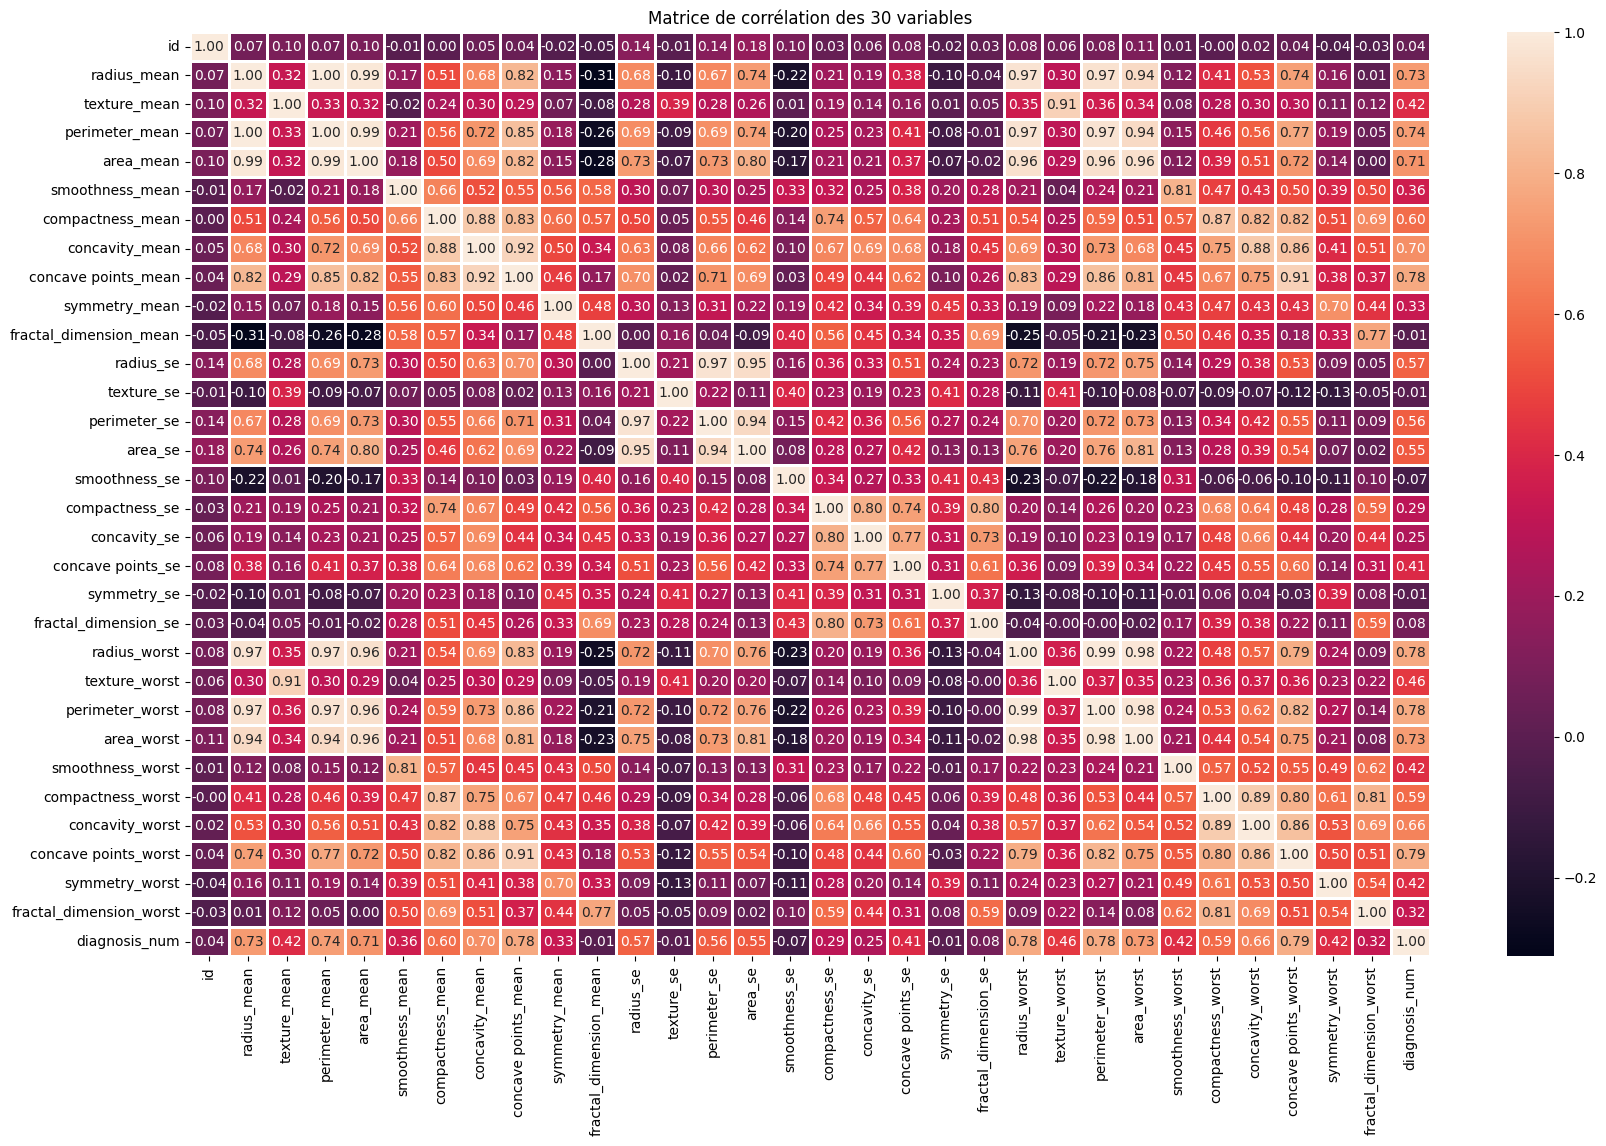

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, linewidths = 1, annot = True, fmt = ".2f")
plt.title('Matrice de corrélation des 30 variables')
plt.show()

Il y a de nombreuses colonnes qui sont très fortement corrélées =  multicolinéarité

==> Est-ce possible de supprimer les variables hautement corrélées ?

In [ ]:

# Tris de la matrice de corrélation par valeur absolue (pour inclure les corrélations négatives)
sorted_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Sélectionner les paires de colonnes avec les corrélations les plus élevées
top_corr_pairs = sorted_corr[sorted_corr < 1].drop_duplicates().head(150)

# Afficher les corrélations les plus fortes
print("Corrélations les plus fortes :")
print(top_corr_pairs)


Corrélations les plus fortes :
radius_mean        perimeter_mean             0.997855
perimeter_worst    radius_worst               0.993708
area_mean          radius_mean                0.987357
                   perimeter_mean             0.986507
area_worst         radius_worst               0.984015
                                                ...   
concavity_worst    radius_mean                0.526911
concavity_mean     smoothness_mean            0.521984
concavity_worst    smoothness_worst           0.518523
concavity_mean     fractal_dimension_worst    0.514930
concave points_se  radius_se                  0.513346
Length: 150, dtype: float64


In [ ]:
corr_df = pd.DataFrame({
    'Variable_1': [pair[0] for pair in top_corr_pairs.index],
    'Variable_2': [pair[1] for pair in top_corr_pairs.index],
    'Correlation': top_corr_pairs.values
})

In [ ]:
corr_df

,Variable_1,Variable_2,Correlation
0,radius_mean,perimeter_mean,0.997855
1,perimeter_worst,radius_worst,0.993708
2,area_mean,radius_mean,0.987357
3,area_mean,perimeter_mean,0.986507
4,area_worst,radius_worst,0.984015
...,...,...,...
145,concavity_worst,radius_mean,0.526911
146,concavity_mean,smoothness_mean,0.521984
147,concavity_worst,smoothness_worst,0.518523
148,concavity_mean,fractal_dimension_worst,0.514930


In [ ]:
forte_corr = corr_df[corr_df['Correlation'] > 0.90]
forte_corr

,Variable_1,Variable_2,Correlation
0,radius_mean,perimeter_mean,0.997855
1,perimeter_worst,radius_worst,0.993708
2,area_mean,radius_mean,0.987357
3,area_mean,perimeter_mean,0.986507
4,area_worst,radius_worst,0.984015
5,area_worst,perimeter_worst,0.977578
6,perimeter_se,radius_se,0.972794
7,perimeter_mean,perimeter_worst,0.970387
8,radius_worst,radius_mean,0.969539
9,perimeter_mean,radius_worst,0.969476


In [ ]:
forte_corr = corr_df[corr_df['Correlation'] > 0.90]
forte_corr

,Variable_1,Variable_2,Correlation
0,radius_mean,perimeter_mean,0.997855
1,perimeter_worst,radius_worst,0.993708
2,area_mean,radius_mean,0.987357
3,area_mean,perimeter_mean,0.986507
4,area_worst,radius_worst,0.984015
5,area_worst,perimeter_worst,0.977578
6,perimeter_se,radius_se,0.972794
7,perimeter_mean,perimeter_worst,0.970387
8,radius_worst,radius_mean,0.969539
9,perimeter_mean,radius_worst,0.969476


In [ ]:
forte_corr = forte_corr.sort_values(by = 'Variable_1')
forte_corr

,Variable_1,Variable_2,Correlation
2,area_mean,radius_mean,0.987357
3,area_mean,perimeter_mean,0.986507
13,area_mean,perimeter_worst,0.959120
11,area_mean,radius_worst,0.962746
14,area_se,radius_se,0.951830
16,area_worst,radius_mean,0.941082
4,area_worst,radius_worst,0.984015
5,area_worst,perimeter_worst,0.977578
12,area_worst,area_mean,0.959213
15,area_worst,perimeter_mean,0.941550


### Observation 10 variables mean

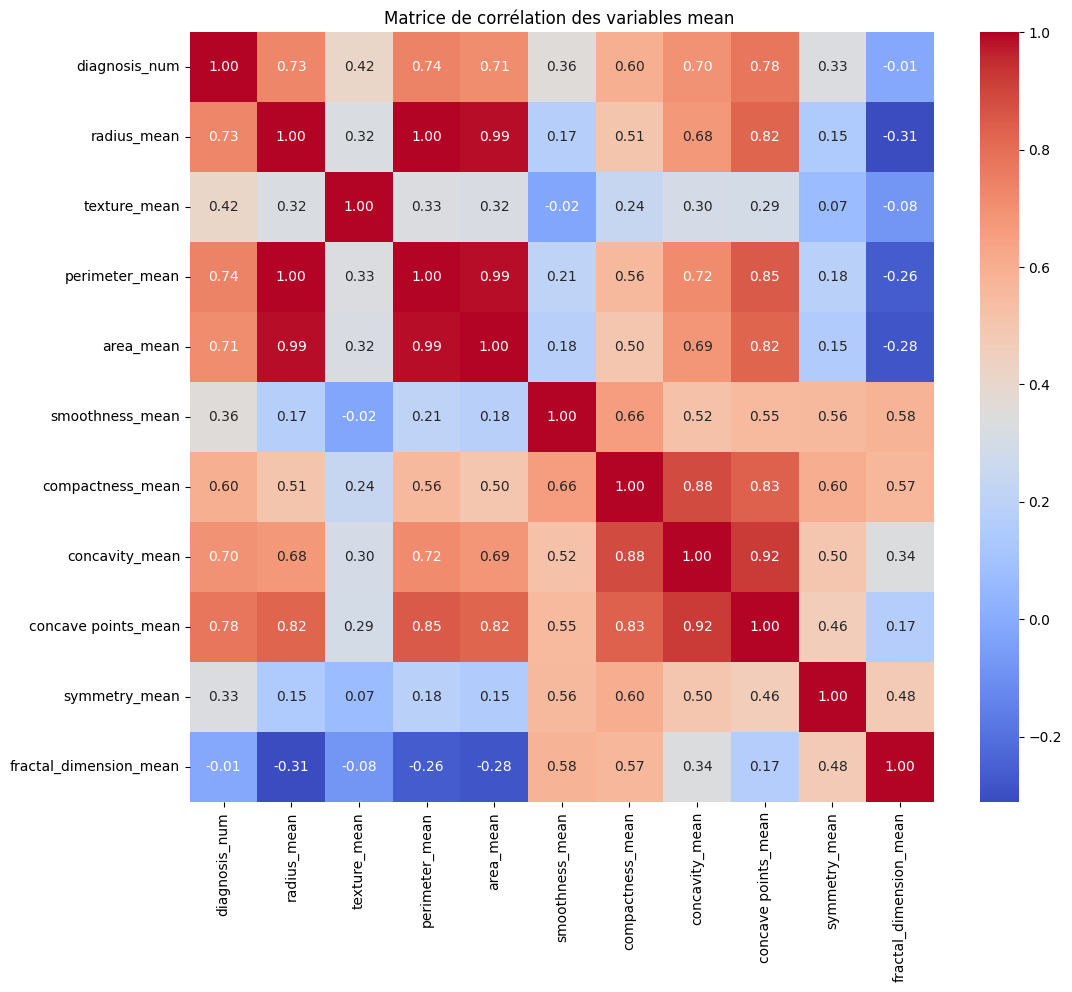

In [ ]:
#correlation
correlation_matrix2 = var_mean.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables mean ')
plt.show()

In [ ]:

sorted_corr2 = correlation_matrix2.abs().unstack().sort_values(ascending=False)

top_corr_pairs2 = sorted_corr2[sorted_corr2 < 1].drop_duplicates().head(150)

print("Corrélations les plus fortes :")
print(top_corr_pairs2)


Corrélations les plus fortes :
radius_mean             perimeter_mean            0.997855
area_mean               radius_mean               0.987357
                        perimeter_mean            0.986507
concavity_mean          concave points_mean       0.921391
                        compactness_mean          0.883121
concave points_mean     perimeter_mean            0.850977
                        compactness_mean          0.831135
                        area_mean                 0.823269
                        radius_mean               0.822529
                        diagnosis_num             0.776614
perimeter_mean          diagnosis_num             0.742636
radius_mean             diagnosis_num             0.730029
concavity_mean          perimeter_mean            0.716136
diagnosis_num           area_mean                 0.708984
concavity_mean          diagnosis_num             0.696360
area_mean               concavity_mean            0.685983
radius_mean             c

In [ ]:
corr_df2 = pd.DataFrame({
    'Variable_1': [pair[0] for pair in top_corr_pairs2.index],
    'Variable_2': [pair[1] for pair in top_corr_pairs2.index],
    'Correlation': top_corr_pairs2.values
})

In [ ]:
corr_df2

,Variable_1,Variable_2,Correlation
0,radius_mean,perimeter_mean,0.997855
1,area_mean,radius_mean,0.987357
2,area_mean,perimeter_mean,0.986507
3,concavity_mean,concave points_mean,0.921391
4,concavity_mean,compactness_mean,0.883121
5,concave points_mean,perimeter_mean,0.850977
6,concave points_mean,compactness_mean,0.831135
7,concave points_mean,area_mean,0.823269
8,concave points_mean,radius_mean,0.822529
9,concave points_mean,diagnosis_num,0.776614


In [ ]:
forte_corr2 = corr_df2[corr_df2['Correlation'] > 0.80]
forte_corr2

,Variable_1,Variable_2,Correlation
0,radius_mean,perimeter_mean,0.997855
1,area_mean,radius_mean,0.987357
2,area_mean,perimeter_mean,0.986507
3,concavity_mean,concave points_mean,0.921391
4,concavity_mean,compactness_mean,0.883121
5,concave points_mean,perimeter_mean,0.850977
6,concave points_mean,compactness_mean,0.831135
7,concave points_mean,area_mean,0.823269
8,concave points_mean,radius_mean,0.822529


In [ ]:
forte_corr2 = forte_corr2.sort_values(by = 'Variable_1')
forte_corr2

,Variable_1,Variable_2,Correlation
1,area_mean,radius_mean,0.987357
2,area_mean,perimeter_mean,0.986507
5,concave points_mean,perimeter_mean,0.850977
6,concave points_mean,compactness_mean,0.831135
7,concave points_mean,area_mean,0.823269
8,concave points_mean,radius_mean,0.822529
3,concavity_mean,concave points_mean,0.921391
4,concavity_mean,compactness_mean,0.883121
0,radius_mean,perimeter_mean,0.997855


### Distribution des variables en fonction du diagnostique :

In [ ]:
import plotly.express as px

variables = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

for variable in variables:
    # Box plot
    fig = px.box(var_mean, x='diagnosis_num', y=variable,
                 title=f'Distribution de {variable} en fonction du diagnostic',
                 labels={'diagnosis': 'Diagnosis', variable: variable})
    fig.show()

    # Histogram
    fig = px.histogram(var_mean, x=variable, color='diagnosis_num', title=f'Distribution de {variable} en fonction du diagnostic')
    fig.show()

#3. Statistiques

### import

In [ ]:
pip install statannot

In [ ]:
from statannot import add_stat_annotation
from scipy import stats

### p-value

In [ ]:
#df_drop

df2 = df_drop.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       556 non-null    int64  
 1   diagnosis                556 non-null    object 
 2   radius_mean              556 non-null    float64
 3   texture_mean             556 non-null    float64
 4   perimeter_mean           556 non-null    float64
 5   area_mean                556 non-null    float64
 6   smoothness_mean          556 non-null    float64
 7   compactness_mean         556 non-null    float64
 8   concavity_mean           556 non-null    float64
 9   concave points_mean      556 non-null    float64
 10  symmetry_mean            556 non-null    float64
 11  fractal_dimension_mean   556 non-null    float64
 12  radius_se                556 non-null    float64
 13  texture_se               556 non-null    float64
 14  perimeter_se             5

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M v.s. B: Kruskal-Wallis paired samples with Bonferroni correction, P_val=2.681e-68 stat=3.050e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M v.s. B: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.419e-28 stat=1.212e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M v.s. B: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.537e-71 stat=3.182e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M v.s. B: Kruskal-Wallis paired samples with Bo

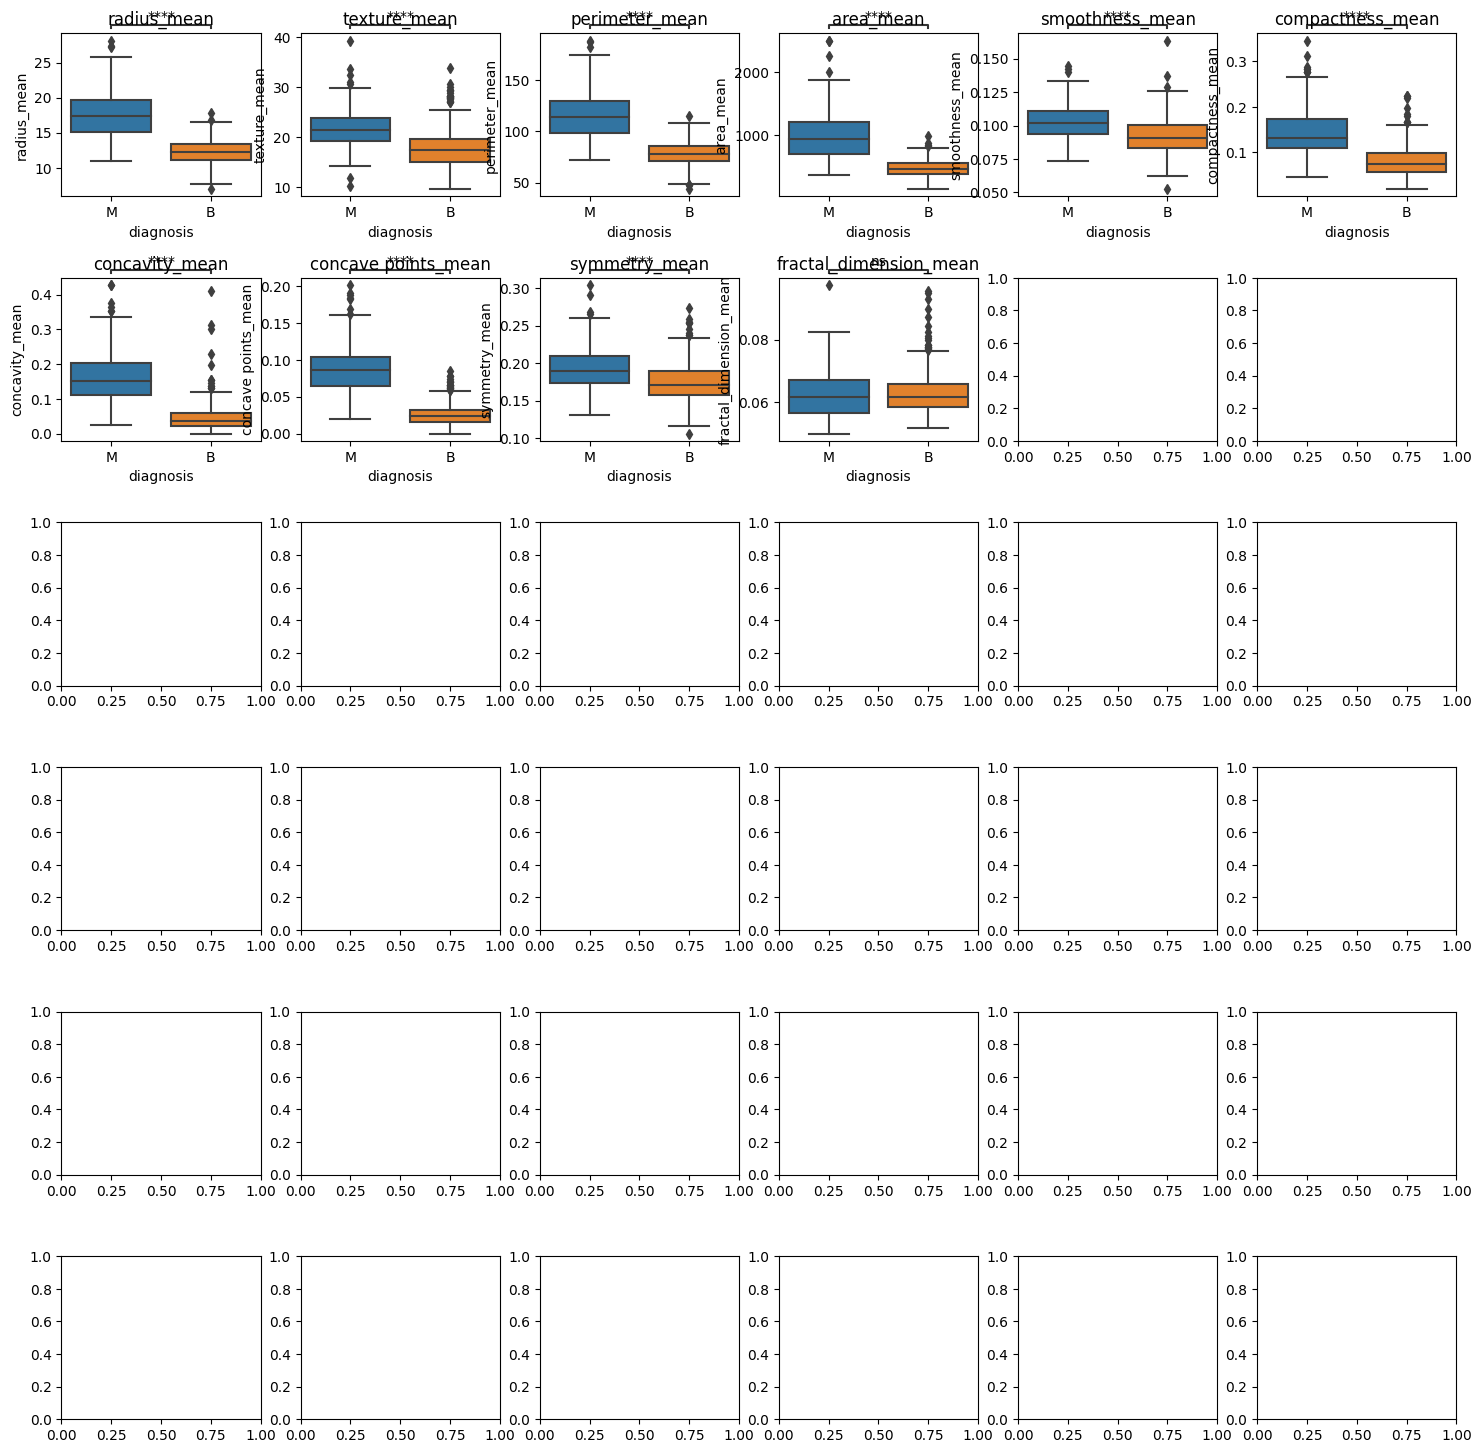

In [ ]:
columns_of_interest = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
    'symmetry_mean', 'fractal_dimension_mean'
]

fig, axes = plt.subplots(6, 6, figsize=(18, 18))
plt.subplots_adjust(hspace=0.5)

def add_stat_annotations(x, y, ax):
    add_stat_annotation(data=df, x=x, y=y, ax=ax, box_pairs=[('M', 'B')],
                        perform_stat_test=True, test='Kruskal', text_format='star', loc='outside', verbose=2)

for i, column in enumerate(columns_of_interest):
    row, col = divmod(i, 6)
    sns.boxplot(x=df['diagnosis'], y=df[column], ax=axes[row, col])
    axes[row, col].set_title(column)
    add_stat_annotations('diagnosis', column, axes[row, col])

plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M v.s. B: Kruskal-Wallis paired samples with Bonferroni correction, P_val=2.681e-68 stat=3.050e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M v.s. B: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.419e-28 stat=1.212e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M v.s. B: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.537e-71 stat=3.182e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M v.s. B: Kruskal-Wallis paired samples with Bo

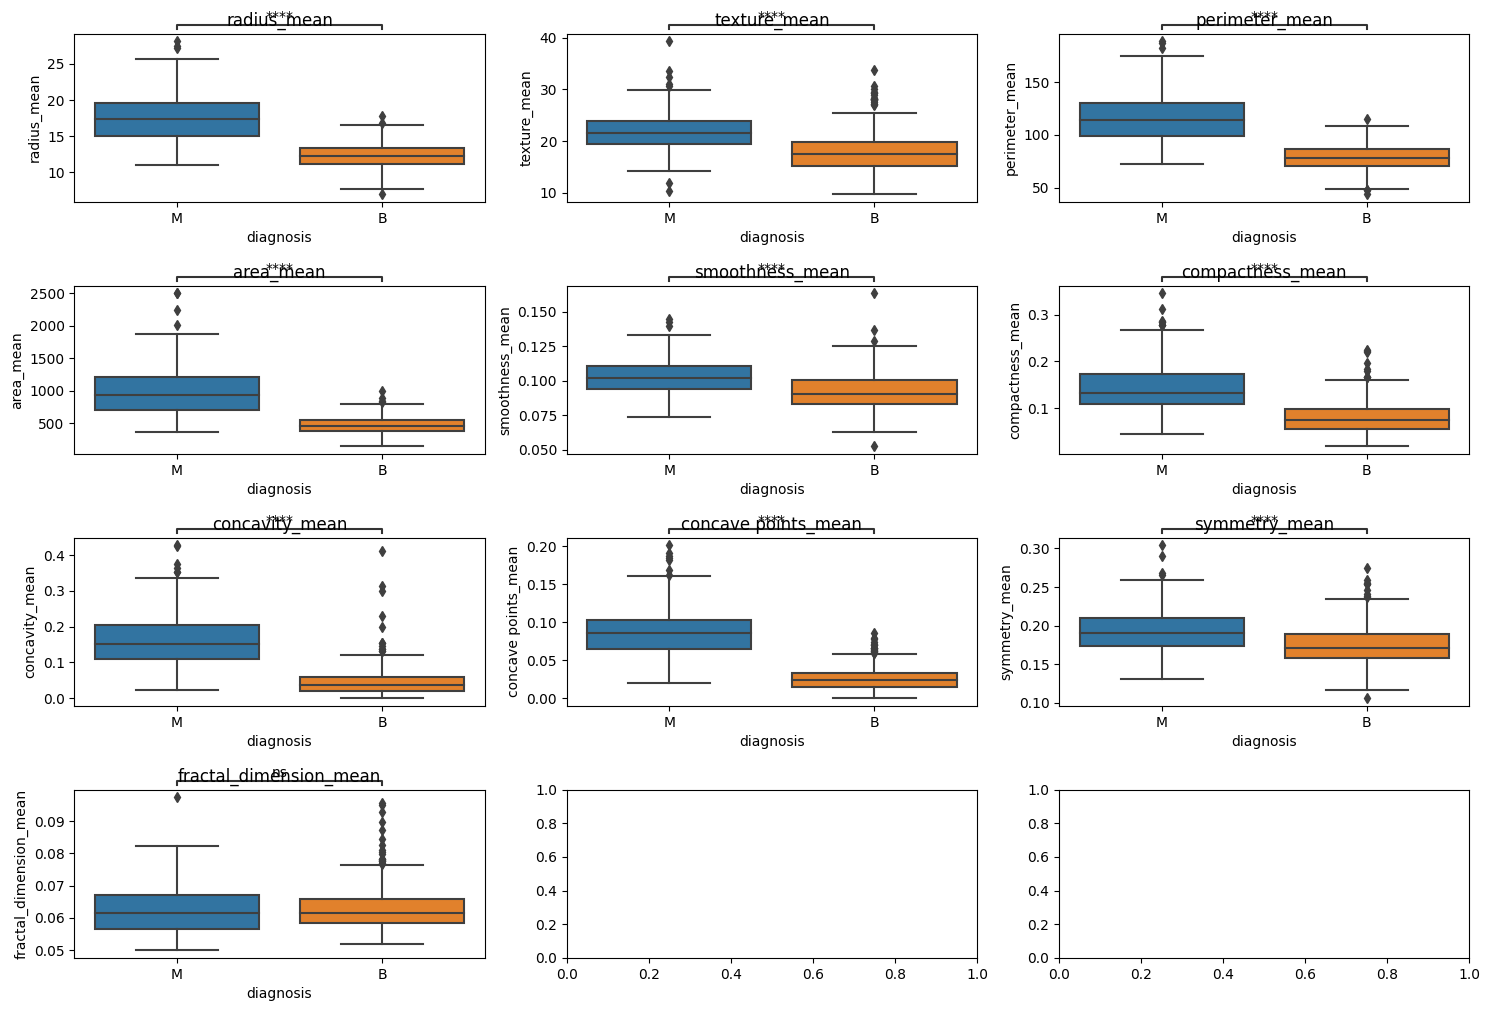

In [ ]:
columns_of_interest = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
    'symmetry_mean', 'fractal_dimension_mean'
]

# Calcule le nombre de lignes et de colonnes nécessaires en fonction de la longueur de columns_of_interest
num_columns = len(columns_of_interest)
num_rows = (num_columns + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 3 * num_rows))
plt.subplots_adjust(hspace=0.5)

def add_stat_annotations(x, y, ax):
    add_stat_annotation(data=df, x=x, y=y, ax=ax, box_pairs=[('M', 'B')],
                        perform_stat_test=True, test='Kruskal', text_format='star', loc='outside', verbose=2)

for i, column in enumerate(columns_of_interest):
    row, col = divmod(i, 3)
    sns.boxplot(x=df['diagnosis'], y=df[column], ax=axes[row, col])
    axes[row, col].set_title(column)
    add_stat_annotations('diagnosis', column, axes[row, col])

plt.show()

## Df à utiliser pour les algorithmes des machines learning

In [ ]:

df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       556 non-null    int64  
 1   diagnosis                556 non-null    object 
 2   radius_mean              556 non-null    float64
 3   texture_mean             556 non-null    float64
 4   perimeter_mean           556 non-null    float64
 5   area_mean                556 non-null    float64
 6   smoothness_mean          556 non-null    float64
 7   compactness_mean         556 non-null    float64
 8   concavity_mean           556 non-null    float64
 9   concave points_mean      556 non-null    float64
 10  symmetry_mean            556 non-null    float64
 11  fractal_dimension_mean   556 non-null    float64
 12  radius_se                556 non-null    float64
 13  texture_se               556 non-null    float64
 14  perimeter_se             5

In [ ]:
#variables à sélectionner
#variables mean
var3 = ['diagnosis','radius_mean','texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

In [ ]:
#df final
df_clean = df_drop[var3]
df_clean

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648


In [ ]:
test = df_clean[df_clean['diagnosis'] == 'B']
test

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,0.1885,0.05766
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,0.1967,0.06811
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,0.1815,0.06905
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,0.1467,0.05863
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,0.06503
...,...,...,...,...,...,...,...,...,...,...,...
555,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.027380,0.1593,0.06127
556,B,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.011160,0.1791,0.06331
558,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.037360,0.1454,0.06147
559,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,0.1388,0.06570


Df pour l'application DASH

In [ ]:
df_clean_all_var = df_drop.copy()

In [ ]:
df_clean_all_var['diagnosis'] = df_clean_all_var['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [ ]:
df_clean_all_var['diagnosis'].value_counts()

0    344
1    212
Name: diagnosis, dtype: int64

Df réquilibré

In [ ]:
df_clean_all_var['diagnosis'].value_counts()

0    344
1    212
Name: diagnosis, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X = df_clean_all_var.drop(['diagnosis'], axis=1)
y = df_clean_all_var['diagnosis']

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialiser le sur-échantillonneur
ros = RandomOverSampler(random_state=42)

# Appliquer le sur-échantillonnage
X_resampled, y_resampled = ros.fit_resample(X, y)

# Nouveau DataFrame avec les données sur-échantillonnées
df_clean_all_var_reajuste = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='diagnosis')], axis=1)

In [ ]:
df_clean_all_var_reajuste['diagnosis'].value_counts()

1    344
0    344
Name: diagnosis, dtype: int64

In [ ]:
df_clean_all_var_reajuste.to_csv('dataset_sein_requilibre.csv', index=False)

#ETAPES - Preprocessing - ML pour le df avec les variables mean

## PyCaret

In [ ]:
#faire un pycaret et observer les ML qui ressortent en premier

In [ ]:
#pip install pycaret

In [ ]:
#from pycaret.classification import *

#exp = setup(df_ml, target='diagnosis')

In [ ]:
#best_model = compare_models()

## IMPORT

In [ ]:
pip install lightgbm

In [ ]:
from sklearn.model_selection import train_test_split
#pour les différents Scaler
from sklearn.preprocessing import MaxAbsScaler, QuantileTransformer, PowerTransformer, MinMaxScaler, StandardScaler, RobustScaler
#pour les différents modèles de ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#pour les metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score

from sklearn.model_selection import cross_val_score

## Automatisation des paramètres du df_final

#####1 - Défini quel df utiliser

utilise un df qui contient uniquement les variables que tu souhaite utiliser

df_final = ton df.copy()

In [ ]:
df_final = df_clean_all_var_reajuste.copy()
df_final.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


#####2 - Définis ta variable TARGET

var_target = 'nom_de_ta_variable'

In [ ]:
target_variable = 'diagnosis'

In [ ]:
df_final[target_variable].unique()

array([1, 0])

##### 3 - (optionel )Numérise ta variable TARGET  si ce n'est pas déjà le cas : malade = 1; non malade = 0

positive_class_value = 'nom_valeur_malade"

In [ ]:
#positive_class_value = 'M'

In [ ]:
#df_final[target_variable] = df_final[target_variable].apply(lambda x: 1 if x == positive_class_value else 0)

In [ ]:
#df_final[target_variable].value_counts()

## Initialisation du ML

In [ ]:
#définir y et X
var = ['radius_mean','texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
X = df_final[var]
y = df_final[target_variable]

In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
683,18.63,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.12440,0.2183,0.06197
684,17.35,23.06,111.00,933.1,0.08662,0.06290,0.02891,0.02837,0.1564,0.05307
685,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,0.1860,0.05941
686,18.66,17.12,121.40,1077.0,0.10540,0.11000,0.14570,0.08665,0.1966,0.06213


In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 688
The length of the train dataset is   : 550
The length of the test dataset is    : 138


## TOP modèles ML avec son best Scaler et cross validation

In [ ]:
#listes

##liste des Scalers utilisés
list_scalers = [
    MaxAbsScaler(),
    QuantileTransformer(),
    PowerTransformer(),
    MinMaxScaler(),
    StandardScaler(),
    RobustScaler()
]
##liste des modèles utilisés
list_models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    LGBMClassifier(verbose=-1),
    LinearSVC(),
    NuSVC(),
    SVC(),
    GaussianNB()
]

#double boucle
results = []
for model in list_models:

    for scaler in list_scalers:

        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)

        accuracy_train = model.score(X_train_scaled, y_train)
        accuracy_test = model.score(X_test_scaled, y_test)

        y_pred_test = model.predict(X_test_scaled)

        recall_test = recall_score(y_test, y_pred_test)
        overfitting = (model.score(X_train_scaled, y_train) - model.score(X_test_scaled, y_test))

        scores = cross_val_score(model, X_train_scaled, y_train, scoring='recall', cv=6)
        avg_scores = scores.mean()

        confusion_mat = confusion_matrix(y_test, y_pred_test)
        matrice = pd.DataFrame(data = confusion_mat,
                 index = model.classes_ ,
                 columns = model.classes_)

        results.append((model.__class__.__name__, scaler.__class__.__name__, accuracy_train, accuracy_test, recall_test, overfitting, avg_scores, matrice))

#tris de la liste results en fonction de la moyenne des scores de cross_validation, puis du recall_test, puis de l'accuracy test
sorted_results = sorted(results, key=lambda x: (x[6], x[4], x[3]), reverse=True)

for model, scaler, accuracy_train, accuracy_test, recall_test, overfitting, avg_scores, matrice in sorted_results:
    print("___________________________")
    print(f"Model: {model}")
    print(f"Scaler: {scaler}")
    print(f"Avg scores - cross validation : {avg_scores}")
    print(f"Accuracy Train: {accuracy_train}")
    print(f"Accuracy Test: {accuracy_test}")
    print(f"Recall Test: {recall_test}")
    print(f"Overfitting: {overfitting}")
    print(matrice)

___________________________
Model: XGBClassifier
Scaler: MaxAbsScaler
Avg scores - cross validation : 0.9557165861513687
Accuracy Train: 1.0
Accuracy Test: 0.9782608695652174
Recall Test: 0.9726027397260274
Overfitting: 0.021739130434782594
    0   1
0  64   1
1   2  71
___________________________
Model: XGBClassifier
Scaler: QuantileTransformer
Avg scores - cross validation : 0.9557165861513687
Accuracy Train: 1.0
Accuracy Test: 0.9782608695652174
Recall Test: 0.9726027397260274
Overfitting: 0.021739130434782594
    0   1
0  64   1
1   2  71
___________________________
Model: XGBClassifier
Scaler: PowerTransformer
Avg scores - cross validation : 0.9557165861513687
Accuracy Train: 1.0
Accuracy Test: 0.9782608695652174
Recall Test: 0.9726027397260274
Overfitting: 0.021739130434782594
    0   1
0  64   1
1   2  71
___________________________
Model: XGBClassifier
Scaler: MinMaxScaler
Avg scores - cross validation : 0.9557165861513687
Accuracy Train: 1.0
Accuracy Test: 0.9782608695652174
R

On veut sélectionner le couple Modèle de ML + Sacler le plus performant tout en évitant les metrics où l'accuracy train est égale à 1

## Cross Validation

In [ ]:
#Cross-validation données de test
model = KNeighborsClassifier()
scaler = QuantileTransformer()
X_train_scaled = scaler.fit_transform(X_train)
model.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred_test = model.predict(X_test_scaled)

scores = cross_val_score(model, X_train_scaled, y_train, cv=6, scoring='recall')

scores

array([0.91304348, 0.97777778, 0.97777778, 0.97777778, 0.86666667,
       0.97777778])

Plus il y a d'écart entre les valeurs, moins nous avons confiance dans la métrique (ca signifie que le découpage a beaucoup d'influence sur notre score). Ici les valeurs sont relativement proches, ce qui me donne confiance en mon modèle de prédiction

In [ ]:
# moyenne des métriques
scores.mean()

0.9484702093397747

In [ ]:
# ecart-type des métriques
scores.std()

0.04355572511125068

L'écart-type est faible = cohérence dans les performances du modèle

In [ ]:
accuracy_test = model.score(X_test_scaled, y_test)
recall_test = recall_score(y_test, y_pred_test)

print("Metrics for KNN Model before best parameters:")
print(f"Accuracy Test: {accuracy_test:.4f}")
print(f"Recall Test: {recall_test:.4f}")


Metrics for KNN Model before best parameters:
Accuracy Test: 0.9565
Recall Test: 0.9589


In [ ]:
# données d'entrainement

y_pred_train = model.predict(X_train_scaled)

accuracy_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)

print(f"Accuracy Train: {accuracy_train:.4f}")
print(f"Recall Train: {recall_train:.4f}")

Accuracy Train: 0.9527
Recall Train: 0.9631


## GridSearch


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : range(1, 101),
              'weights' : ['uniform', 'distance']}

gsearch = GridSearchCV(model, parameters, cv = 6)
gsearch.fit(X_train_scaled, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 101),
                         'weights': ['uniform', 'distance']})

In [ ]:
#meilleures valeurs des hyperparamètres
print(f"Best accuracy score: {gsearch.best_score_:.5f}")
print(f"Best parameters: {gsearch.best_params_}")
print(f"Best estimator: {gsearch.best_estimator_}")

Best accuracy score: 0.94541
Best parameters: {'n_neighbors': 6, 'weights': 'distance'}
Best estimator: KNeighborsClassifier(n_neighbors=6, weights='distance')


## Model et Scaler avec best parameters

In [ ]:
#gridsearch
best_model_g = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')

X_train_scaled_g = scaler.fit_transform(X_train)
best_model_g.fit(X_train_scaled_g, y_train)
X_test_scaled_g = scaler.transform(X_test)

y_pred_g = best_model_g.predict(X_test_scaled_g)
accuracy_g = accuracy_score(y_test, y_pred_g)
recall_g = recall_score(y_test, y_pred_g)
confusion_mat_g = confusion_matrix(y_test, y_pred_g)

print("Metrics for GridSearch Model:")
print(f"Accuracy: {accuracy_g:.4f}")
print(f"Recall: {recall_g:.4f}")

Metrics for GridSearch Model:
Accuracy: 0.9565
Recall: 0.9589


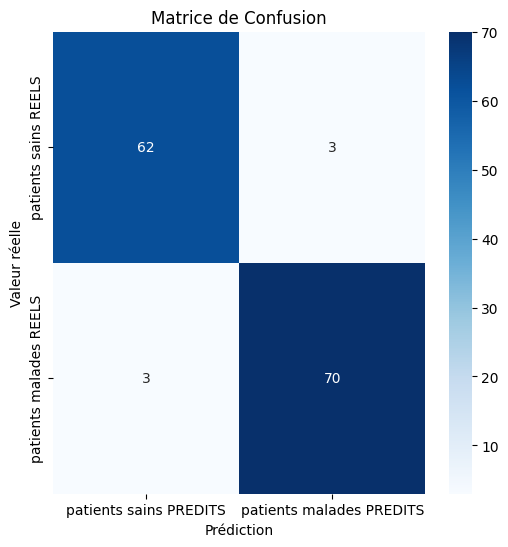

In [ ]:
# matrice de confusion
confusion_mat = confusion_matrix(y_test, y_pred_g)
classes = ['patients sains', 'patients malades']


matrice = pd.DataFrame(data=confusion_mat,
                       index=[f'{cls} REELS' for cls in classes],
                       columns=[f'{cls} PREDITS' for cls in classes])

# heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(matrice, annot=True, cmap='Blues', fmt='g')


plt.xlabel('Prédiction')
plt.ylabel('Valeur réelle')
plt.title('Matrice de Confusion')

plt.show()

## PREDICTIONS

In [ ]:
patient_malade_index_0 = [[17.99, 10.38, 122.80, 1001.0, 0.11840, 0.27760, 0.30010, 0.14710, 0.2419, 0.07871]]

patient_malade_index_0_scal = scaler.transform(patient_malade_index_0)

pred = model.predict(patient_malade_index_0_scal)

print(f"Prediction: {pred}")

Prediction: [1]


In [ ]:
proba_pred = model.predict_proba(patient_malade_index_0_scal)
proba_pred

array([[0., 1.]])

In [ ]:
patient_non_malade_index_19 = [[13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766]]

patient_non_malade_index_19_scal = scaler.transform(patient_non_malade_index_19)

pred2 = model.predict(patient_non_malade_index_19_scal)

print(f"Prediction: {pred2}")

Prediction: [0]


In [ ]:
proba_pred2 = model.predict_proba(patient_non_malade_index_19_scal)
proba_pred2

array([[1., 0.]])

In [ ]:
# Obtenir les classes prédites par le modèle
classes = model.classes_

# Afficher les classes
print("Classes prédites :", classes)

# Afficher les probabilités de prédiction
print("Probabilités de prédiction :", proba_pred2)

Classes prédites : [0 1]
Probabilités de prédiction : [[1. 0.]]


In [ ]:
nouveau_patient = [[15.0, 20.0, 100.0, 800.0, 0.1, 0.2, 0.25, 0.15, 0.3, 0.05]]

nouveau_patient_scal = scaler.transform(nouveau_patient)

pred3 = model.predict(nouveau_patient_scal)

print(f"Prediction: {pred3}")

Prediction: [1]


In [ ]:
proba_pred3 = model.predict_proba(nouveau_patient_scal)
proba_pred3

array([[0., 1.]])

## Feature_importance

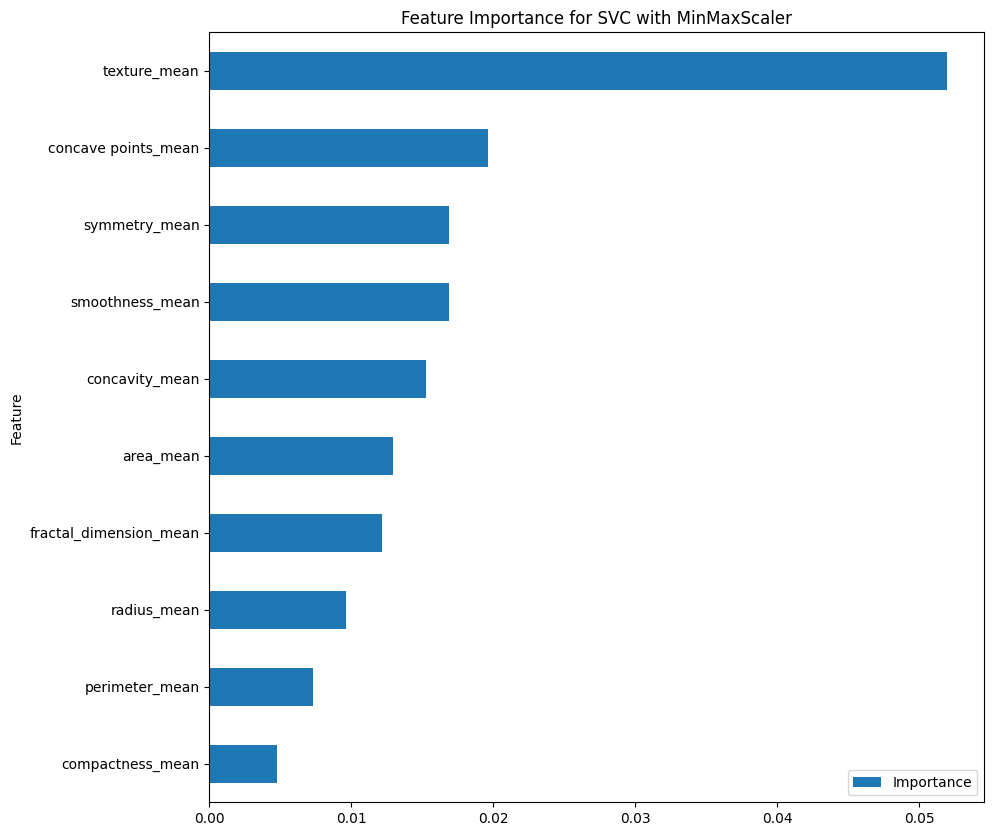

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model_g, X_train_scaled_g, y_train, n_repeats=10, random_state=42)

feature_importance_svc = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
feature_importance_svc = feature_importance_svc.sort_values('Importance', ascending=True)

feature_importance_svc.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 10))
plt.title('Feature Importance for SVC with MinMaxScaler')
plt.show()

## LASSO CV

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
reg = LassoCV()
reg.fit(X_train_scaled_g, y_train)

LassoCV()

In [ ]:
#print("Best alpha using built-in LassoCV: %f" % reg.alphas_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train_scaled_g,y_train))
coef = pd.Series(reg.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best score using built-in LassoCV: 0.731612
Lasso picked 8 variables and eliminated the other 2 variables


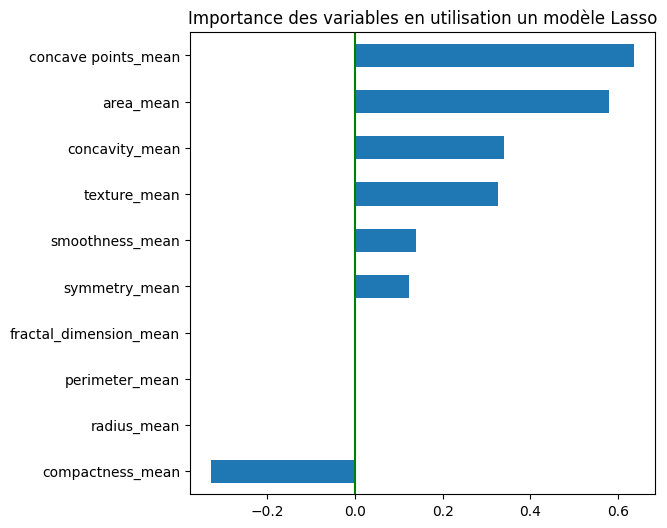

In [ ]:
fig = plt.figure(figsize=(6,6))
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.axvline(x=0, color='g')
plt.title("Importance des variables en utilisation un modèle Lasso")
fig.savefig('importance_graph.png', dpi=200, bbox_inches = 'tight') ;

On peut donc retirer les variables fractal_dimensions, perimeter et radius qui n'apportent rien dans nos algorithmes

## SHAP

In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:
# Convertir le résultat en DataFrame avec les noms de colonnes
X_test_shape = pd.DataFrame(X_test_scaled_g, columns=list(X_test.columns))
X_train_shape = pd.DataFrame(X_train_scaled_g, columns=list(X_train.columns))

In [ ]:
explainer = shap.KernelExplainer(best_model_g.predict,shap.sample(X_test_shape,100))

In [ ]:
shap_values = explainer.shap_values(X_test_shape,nsamples=100)

  0%|          | 0/138 [00:00<?, ?it/s]

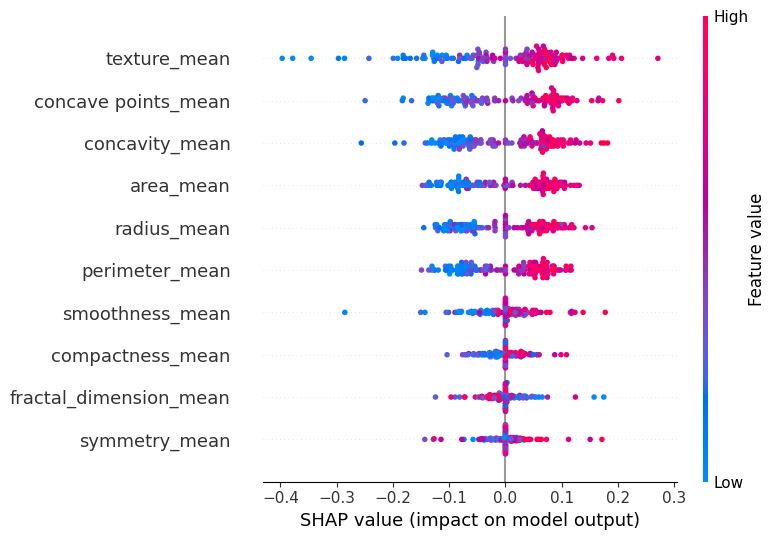

In [ ]:
shap.summary_plot(shap_values,X_test_shape)

# DEEP LEARNING RESEAU DE NEURONNE

In [ ]:
# Pour le DEEP LEARNING
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPClassifier

In [ ]:
QTscaler = QuantileTransformer()

In [ ]:
X = df_final.drop(target_variable, axis=1)
y = df_final[target_variable]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)

In [ ]:
X_train_scaled = QTscaler.fit_transform(X_train)
X_test_scaled = QTscaler.transform(X_test)

In [ ]:
print(X_train_scaled.shape)

(516, 31)


## Keras

In [ ]:
modelK = Sequential()

In [ ]:
#modelMLP.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
#modelMLP.add(Dense(32, activation='relu'))
#modelMLP.add(Dense(1, activation='sigmoid'))

In [ ]:
modelK.add(Dense(64,activation='relu'))
modelK.add(Dropout(0.2))

modelK.add(Dense(32,activation='relu'))
modelK.add(Dropout(0.2))

modelK.add(Dense(16,activation='relu'))

modelK.add(Dense(1,activation='sigmoid'))

In [ ]:
modelK.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy','Recall'])
#modelMLP.compile(optimizer=Adam(), loss='binary_crossentropy')


In [ ]:
#early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=9)

In [ ]:
modelK.fit(X_train_scaled, y_train, epochs=40, validation_data=[X_test_scaled, y_test], validation_split=0.2)

Epoch 1/40
17/17 [==============================] - 2s 32ms/step - loss: 0.6649 - accuracy: 0.5833 - recall: 0.7315 - val_loss: 0.6092 - val_accuracy: 0.6744 - val_recall: 1.0000
Epoch 2/40
17/17 [==============================] - 0s 5ms/step - loss: 0.5820 - accuracy: 0.6744 - recall: 0.9689 - val_loss: 0.5233 - val_accuracy: 0.7442 - val_recall: 0.9885
Epoch 3/40
17/17 [==============================] - 0s 5ms/step - loss: 0.4951 - accuracy: 0.7694 - recall: 0.9689 - val_loss: 0.4190 - val_accuracy: 0.8256 - val_recall: 0.9655
Epoch 4/40
17/17 [==============================] - 0s 5ms/step - loss: 0.4264 - accuracy: 0.8236 - recall: 0.9222 - val_loss: 0.3486 - val_accuracy: 0.8605 - val_recall: 0.9540
Epoch 5/40
17/17 [==============================] - 0s 3ms/step - loss: 0.3643 - accuracy: 0.8585 - recall: 0.9144 - val_loss: 0.2854 - val_accuracy: 0.8953 - val_recall: 0.9540
Epoch 6/40
17/17 [==============================] - 0s 4ms/step - loss: 0.2949 - accuracy: 0.8934 - recall: 0

In [ ]:
loss, accuracy ,recall = modelK.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Recall: {recall:.4f}")

6/6 [==============================] - 0s 3ms/step - loss: 0.1701 - accuracy: 0.9302 - recall: 0.9310
Test Loss: 0.1701
Test Accuracy: 0.9302
Test Recall: 0.9310


## MLP via skleanr + optim hyperparametres

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (256,)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

In [ ]:
mlp_model = MLPClassifier(max_iter=1000)

In [ ]:
def custom_scorer(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    # Poids arbitraire pour favoriser le recall
    return 0.8 * recall + 0.2 * accuracy

In [ ]:
grid_search = GridSearchCV(mlp_model, param_grid, cv=3, scoring='recall', verbose=1)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000),
             param_grid={'activation': ['relu', 'tanh', 'sigmoid'],
                         'hidden_layer_sizes': [(64,), (128,), (256,)],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             scoring='recall', verbose=1)

In [ ]:
print("Meilleurs hyperparamètres:", grid_search.best_params_)

Meilleurs hyperparamètres: {'activation': 'relu', 'hidden_layer_sizes': (256,), 'learning_rate_init': 0.1}


In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
y_pred = final_model.predict(X_test_scaled)

In [ ]:
final_recall = recall_score(y_test, y_pred)
final_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy sur l'ensemble de test:", final_accuracy)
print("Recall sur l'ensemble de test:", final_recall)

Accuracy sur l'ensemble de test: 0.9186046511627907
Recall sur l'ensemble de test: 0.9080459770114943
